### Running SpliceAI locally on a synthetic TYK2 transcript sequence

In [17]:
# Within DMS docker container on radula

from  tensorflow.keras.models import load_model
from pkg_resources import resource_filename
from spliceai.utils import one_hot_encode
import numpy as np

In [47]:
# Input sequence
input_sequence = 'CGATCTGACGTGGGTGTCATCGCATTATCGATATTGCAT'
input_sequence = 'ATGCCTCTGCGCCACTGGGGGATGGCCAGGGGCAGTAAGCCCGTTGGGGATGGAGCCCAGCCCATGGCTGCCATGGGAGGCCTGAAGGTGCTTCTGCACTGGGCTGGTCCAGGCGGCGGGGAGCCCTGGGTCACTTTCAGTGAGTCATCGCTGACAGCTGAGGAAGTCTGCATCCACATTGCACATAAAGTTGGTATCACTCCTCCTTGCTTCAATCTCTTTGCCCTCTTCGATGCTCAGGCCCAAGTCTGGTTGCCCCCAAACCACATCCTAGAGATCCCCAGAGATGCAAGCCTGATGCTATATTTCCGCATAAGGTTTTATTTCCGGAACTGGCATGGCATGAATCCTCGGGAACCGGCTGTGTACCGTTGTGGGCCCCCAGGAACCGAGGCATCCTCAGATCAGACAGCACAGGGGATGCAACTCCTGGACCCAGCCTCATTTGAGTACCTCTTTGAGCAGGGCAAGCATGAGTTTGTGAATGACGTGGCATCACTGTGGGAGCTGTCGACCGAGGAGGAGATCCACCACTTTAAGAATGAGAGCCTGGGCATGGCCTTTCTGCACCTCTGTCACCTCGCTCTCCGCCATGGCATCCCCCTGGAGGAGGTGGCCAAGAAGACCAGCTTCAAGGACTGCATCCCGCGCTCCTTCCGCCGGCATATCCGGCAGCACAGCGCCCTGACCCGGCTGCGCCTTCGGAACGTCTTCCGCAGGTTCCTGCGGGACTTCCAGCCGGGCCGACTCTCCCAGCAGATGGTCATGGTCAAATACCTAGCCACACTCGAGCGGCTGGCACCCCGCTTCGGCACAGAGCGTGTGCCCGTGTGCCACCTGAGGCTGCTGGCCCAGGCCGAGGGGGAGCCCTGCTACATCCGGGACAGTGGGGTGGCCCCTACAGACCCTGGCCCTGAGTCTGCTGCTGGGCCCCCAACCCACGAGGTGCTGGTGACAGGCACTGGTGGCATCCAGTGGTGGCCAGTAGAGGAGGAGGTGAACAAGGAGGAGGGTTCTAGTGGCAGCAGTGGCAGGAACCCCCAAGCCAGCCTGTTTGGGAAGAAGGCCAAGGCTCACAAGGCAGTCGGCCAGCCGGCAGACAGGCCGCGGGAGCCACTGTGGGCCTACTTCTGTGACTTCCGGGACATCACCCACGTGGTGCTGAAAGAGCACTGTGTCAGCATCCACCGGCAGGACAACAAGTGCCTGGAGCTGAGCTTGCCTTCCCGGGCTGCGGCGCTGTCCTTCGTGTCGCTGGTGGACGGCTATTTCCGCCTGACGGCCGACTCCAGCCACTACCTGTGCCACGAGGTGGCTCCCCCACGGCTGGTGATGAGCATCCGGGATGGGATCCACGGACCCCTGCTGGAGCCATTTGTGCAGGCCAAGCTGCGGCCCGAGGACGGCCTGTACCTCATTCACTGGAGCACCAGCCACCCCTACCGCCTGATCCTCACAGTGGCCCAGCGTAGCCAGGCACCAGACGGCATGCAGAGCTTGCGGCTCCGAAAGTTCCCCATTGAGCAGCAGGACGGGGCCTTCGTGCTGGAGGGCTGGGGCCGGTCCTTCCCCAGCGTTCGGGAACTTGGGGCTGCCTTGCAGGGCTGCTTGCTGAGGGCCGGGGATGACTGCTTCTCTCTGCGTCGCTGTTGCCTGCCCCAACCAGGAGAAACCTCCAATCTCATCATCATGCGGGGGGCTCGGGCCAGCCCCAGGACACTCAACCTCAGCCAGCTCAGCTTCCACCGGGTTGACCAGAAGGAGATCACCCAGCTGTCCCACTTGGGCCAGGGCACAAGGACCAACGTGTATGAGGGCCGCCTGCGAGTGGAGGGCAGCGGGGACCCTGAGGAGGGCAAGATGGATGACGAGGACCCCCTCGTGCCTGGCAGGGACCGTGGGCAGGAGCTACGAGTGGTGCTCAAAGTGCTGGACCCTAGTCACCATGACATCGCCCTGGCCTTCTACGAGACAGCCAGCCTCATGAGCCAGGTCTCCCACACGCACCTGGCCTTCGTGCATGGCGTCTGTGTGCGCGGCCCTGAAAATATCATGGTGACAGAGTACGTGGAGCACGGACCCCTGGATGTGTGGCTGCGGAGGGAGCGGGGCCATGTGCCCATGGCTTGGAAGATGGTGGTGGCCCAGCAGCTGGCCAGCGCCCTCAGCTACCTGGAGAACAAGAACCTGGTTCATGGTAATGTGTGTGGCCGGAACATCCTGCTGGCCCGGCTGGGGTTGGCAGAGGGCACCAGCCCCTTCATCAAGCTGAGTGATCCTGGCGTGGGCCTGGGCGCCCTCTCCAGGGAGGAGCGGGTGGAGAGGATCCCCTGGCTGGCCCCCGAATGCCTACCAGGTGGGGCCAACAGCCTAAGCACCGCCATGGACAAGTGGGGGTTTGGCGCCACCCTCCTGGAGATCTGCTTTGACGGAGAGGCCCCTCTGCAGAGCCGCAGTCCCTCCGAGAAGGAGCATTTCTACCAGAGGCAGCACCGGCTGCCCGAGCCCTCCTGCCCACAGCTGGCCACACTCACCAGCCAGTGTCTGACCTATGAGCCAACCCAGAGGCCATCATTCCGCACCATCCTGCGTGACCTCACCCGGCTGCAGCCCCACAATCTTGCTGACGTCTTGACTGTGAACCCGGACTCACCGGCGTCGGACCCTACGGTTTTCCACAAGCGCTATTTGAAAAAGATCCGAGATCTGGGCGAGGGTCACTTCGGCAAGGTCAGCTTGTACTGCTACGATCCGACCAACGACGGCACTGGCGAGATGGTGGCGGTGAAAGCCCTCAAGGCAGACTGCGGCCCCCAGCACCGCTCGGGCTGGAAGCAGGAGATTGACATTCTGCGCACGCTCTACCACGAGCACATCATCAAGTACAAGGGCTGCTGCGAGGACCAAGGCGAGAAGTCGCTGCAGCTGGTCATGGAGTACGTGCCCCTGGGCAGCCTCCGAGACTACCTGCCCCGGCACAGCATCGGGCTGGCCCAGCTGCTGCTCTTCGCCCAGCAGATCTGCGAGGGCATGGCCTATCTGCACGCGCAGCACTACATCCACCGAGACCTAGCCGCGCGCAACGTGCTGCTGGACAACGACAGGCTGGTCAAGATCGGGGACTTTGGCCTAGCCAAGGCCGTGCCCGAAGGCCACGAGTACTACCGCGTGCGCGAGGATGGGGACAGCCCCGTGTTCTGGTATGCCCCAGAGTGCCTGAAGGAGTATAAGTTCTACTATGCGTCAGATGTCTGGTCCTTCGGGGTGACCCTGTATGAGCTGCTGACGCACTGTGACTCCAGCCAGAGCCCCCCCACGAAATTCCTTGAGCTCATAGGCATTGCTCAGGGTCAGATGACAGTTCTGAGACTCACTGAGTTGCTGGAACGAGGGGAGAGGCTGCCACGGCCCGACAAATGTCCCTGTGAGGTCTATCATCTCATGAAGAACTGCTGGGAGACAGAGGCGTCCTTTCGCCCAACCTTCGAGAACCTCATACCCATTCTGAAGACAGTCCATGAGAAGTACCAAGGCCAGGCCCCTTCAGTGTTCAGCGTGTGCTGA'

input_sequence_mut = 'ATGCCTCTGCGCCACTGGGGGATGGCCAGGGGCAGTAAGCCCGTTGGGGATGGAGCCCAGCCCATGGCTGCCATGGGAGGCCTGAAGGTGCTTCTGCACTGGGCTGGTCCAGGCGGCGGGGAGCCCTGGGTCACTTTCAGTGAGTCATCGCTGACAGCTGAGGAAGTCTGCATCCACATTGCACATAAAGTTGGTATCACTCCTCCTTGCTTCAATCTCTTTGCCCTCTTCGATGCTCAGGCCCAAGTCTGGTTGCCCCCAAACCACATCCTAGAGATCCCCAGAGATGCAAGCCTGATGCTATATTTCCGCATAAGGTTTTATTTCCGGAACTGGCATGGCATGAATCCTCGGGAACCGGCTGTGTACCGTTGTGGGCCCCCAGGAACCGAGGCATCCTCAGATCAGACAGCACAGGGGATGCAACTCCTGGACCCAGCCTCATTTGAGTACCTCTTTGAGCAGGGCAAGCATGAGTTTGTGAATGACGTGGCATCACTGTGGGAGCTGTCGACCGAGGAGGAGATCCACCACTTTAAGAATGAGAGCCTGGGCATGGCCTTTCTGCACCTCTGTCACCTCGCTCTCCGCCATGGCATCCCCCTGGAGGAGGTGGCCAAGAAGACCAGCTTCAAGGACTGCATCCCGCGCTCCTTCCGCCGGCATATCCGGCAGCACAGCGCCCTGACCCGGCTGCGCCTTCGGAACGTCTTCCGCAGGTTCCTGCGGGACTTCCAGCCGGGCCGACTCTCCCAGCAGATGGTCATGGTCAAATACCTAGCCACACTCGAGCGGCTGGCACCCCGCTTCGGCACAGAGCGTGTGCCCGTGTGCCACCTGAGGCTGCTGGCCCAGGCCGAGGGGGAGCCCTGCTACATCCGGGACAGTGGGGTGGCCCCTACAGACCCTGGCCCTGAGTCTGCTGCTGGGCCCCCAACCCACGAGGTGCTGGTGACAGGCACTGGTGGCATCCAGTGGTGGCCAGTAGAGGAGGAGGTGAACAAGGAGGAGGGTTCTAGTGGCAGCAGTGGCAGGAACCCCCAAGCCAGCCTGTTTGGGAAGAAGGCCAAGGCTCACAAGGCAGTCGGCCAGCCGGCAGACAGGCCGCGGGAGCCACTGTGGGCCTACTTCTGTGACTTCCGGGACATCACCCACGTGGTGCTGAAAGAGCACTGTGTCAGCATCCACCGGCAGGACAACAAGTGCCTGGAGCTGAGCTTGCCTTCCCGGGCTGCGGCGCTGTCCTTCGTGTCGCTGGTGGACGGCTATTTCCGCCTGACGGCCGACTCCAGCCACTACCTGTGCCACGAGGTGGCTCCCCCACGGCTGGTGATGAGCATCCGGGATGGGATCCACGGACCCCTGCTGGAGCCATTTGTGCAGGCCAAGCTGCGGCCCGAGGACGGCCTGTACCTCATTCACTGGAGCACCAGCCACCCCTACCGCCTGATCCTCACAGTGGCCCAGCGTAGCCAGGCACCAGACGGCATGCAGAGCTTGCGGCTCCGAAAGTTCCCCATTGAGCAGCAGGACGGGGCCTTCGTGCTGGAGGGCTGGGGCCGGTCCTTCCCCAGCGTTCGGGAACTTGGGGCTGCCTTGCAGGGCTGCTTGCTGAGGGCCGGGGATGACTGCTTCTCTCTGCGTCGCTGTTGCCTGCCCCAACCAGGAGAAACCTCCAATCTCATCATCATGCGGGGGGCTCGGGCCAGCCCCAGGACACTCAACCTCAGCCAGCTCAGCTTCCACCGGGTTGACCAGAAGGAGATCACCCAGCTGTCCCACTTGGGCCAGGGCACAAGGACCAACGTGTATGAGGGCCGCCTGCGAGTGGAGGGCAGCGGGGACCCTGAGGAGGGCAAGATGGATGACGAGGACCCCCTCGTGCCTGGCAGGGACCGTGGGCAGGAGCTACGAGTGGTGCTCAAAGTGCTGGACCCTAGTCACCATGACATCGCCCTGGCCTTCTACGAGACAGCCAGCCTCATGAGCCAGGTCTCCCACACGCACCTGGCCTTCGTGCATGGCGTCTGTGTGCGCGGCCCTGAAAATATCATGGTGACAGAGTACGTGGAGCACGGACCCCTGGATGTGTGGCTGCGGAGGGAGCGGGGCCATGTGCCCATGGCTTGGAAGATGGTGGTGGCCCAGCAGCTGGCCAGCGCCCTCAGCTACCTGGAGAACAAGAACCTGGTTCATGGTAATGTGTGTGGCCGGAACATCCTGCTGGCCCGGCTGGGGTTGGCAGAGGGCACCAGCCCCTTCATCAAGCTGAGTGATCCTGGCGTGGGCCTGGGCGCCCTCTCCAGGGAGGAGCGGGTGGAGAGGATCCCCTGGCTGGCCCCCGAATGCCTACCAGGTGGGGCCAACAGCCTAAGCACCGCCATGGACAAGTGGGGGTTTGGCGCCACCCTCCTGGAGATCTGCTTTGACGGAGAGGCCCCTCTGCAGAGCCGCAGTCCCTCCGAGAAGGAGCATTTCTACCAGAGGCAGCACCGGCTGCCCGAGCCCTCCTGCCCACAGCTGGCCACACTCACCAGCCAGTGTCTGACCTATGAGCCAACCCAGAGGCCATCATTCCGCACCATCCTGCGTGACCTCACCCGGCTGCAGCCCCACAATCTTGCTGACGTCTTGACTGTGAACCCGGACTCACCGGCGTCGGACCCTACGGTTTTCCACAAGCGCTATTTGAAAAAGATCCGAGATCTGGGCGAGGGTCACTTCGGCAAGGTCAGCTTGTACTGCTACGATCCGACCAACGACGGCACTGGCGAGATGGTGGCGGTGAAAGCCCTCAAGGCAGACTGCGGCCCCCAGCACCGCTCGGGCTGGAAGCAGGAGATTGACATTCTGCGCACGCTCTACCACGAGCACATCATCAAGTACAAGGGCTGCTGCGAGGACCAAGGCGAGAAGTCGCTGCAGCTGGTCATGGAGTACGTGCCCCTGGGCAGCCTCCGAGACTACCTGCCCCGGCACAGCATCGGGCTGGCCCAGCTGCTGCTCTTtGCCCAGCAGATCTGCGAGGGCATGGCCTATCTGCACGCGCAGCACTACATCCACCGAGACCTAGCCGCGCGCAACGTGCTGCTGGACAACGACAGGCTGGTCAAGATCGGGGACTTTGGCCTAGCCAAGGCCGTGCCCGAAGGCCACGAGTACTACCGCGTGCGCGAGGATGGGGACAGCCCCGTGTTCTGGTATGCCCCAGAGTGCCTGAAGGAGTATAAGTTCTACTATGCGTCAGATGTCTGGTCCTTCGGGGTGACCCTGTATGAGCTGCTGACGCACTGTGACTCCAGCCAGAGCCCCCCCACGAAATTCCTTGAGCTCATAGGCATTGCTCAGGGTCAGATGACAGTTCTGAGACTCACTGAGTTGCTGGAACGAGGGGAGAGGCTGCCACGGCCCGACAAATGTCCCTGTGAGGTCTATCATCTCATGAAGAACTGCTGGGAGACAGAGGCGTCCTTTCGCCCAACCTTCGAGAACCTCATACCCATTCTGAAGACAGTCCATGAGAAGTACCAAGGCCAGGCCCCTTCAGTGTTCAGCGTGTGCTGA'

In [19]:
# Load models
context = 10000
paths = ('../SpliceAI/spliceai/models/spliceai{}.h5'.format(x) for x in range(1, 6))
models = [load_model(x) for x in paths]

In [39]:
# One-hot encode sequence and predict

x = one_hot_encode('N'*(context//2) + input_sequence + 'N'*(context//2))[None, :]
y = np.mean([models[m].predict(x) for m in range(5)], axis=0)

In [48]:
x_mut = one_hot_encode('N'*(context//2) + input_sequence_mut + 'N'*(context//2))[None, :]
y_mut = np.mean([models[m].predict(x) for m in range(5)], axis=0)

In [49]:
# Extract donor and acceptor probabilities from returned numpy array

acceptor_prob = y[0, :, 1]
donor_prob = y[0, :, 2]

acceptor_prob_mut = y_mut[0, :, 1]
donor_prob_mut = y_mut[0, :, 2]

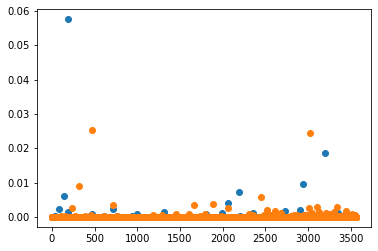

In [45]:
# Plot

from matplotlib import pyplot
pyplot.scatter(range(0,len(input_sequence)),donor_prob)
pyplot.scatter(range(0,len(input_sequence)),acceptor_prob)

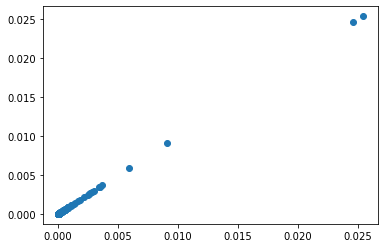

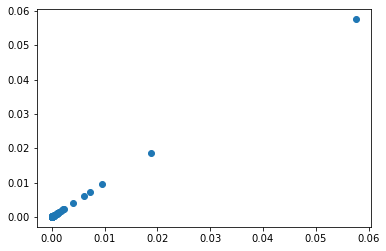

In [53]:
pyplot.scatter(acceptor_prob,acceptor_prob_mut)
pyplot.figure(0)
pyplot.scatter(donor_prob,donor_prob_mut)